# ACTIVIDAD 2: REDES NEURONALES CONVOLUCIONALES

---

En esta actividad, vamos a trabajar con Convolutional Neural Networks para resolver un problema de clasificación de imágenes. En particular, vamos a clasificar diez clases que incluyen fundamentalmente animales y vehículos.

Como las CNN profundas son un tipo de modelo bastante avanzado y computacionalmente costoso, se recomienda hacer la práctica en Google Colaboratory con soporte para GPUs. En [este enlace](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) se explica cómo activar un entorno con GPUs. *Nota: para leer las imágenes y estandarizarlas al mismo tamaño se usa la librería opencv. Esta ĺibrería está ya instalada en el entorno de Colab, pero si trabajáis de manera local tendréis que instalarla.*

<center><img src="https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png" style="text-align: center" height="300px"></center>

El dataset a utilizar consiste en 60000 imágenes a color de 10 clases de animales y vehículos. El dataset en cuestión se denomina [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) y es más complejo que el dataset MNIST que hemos utilizado en la actividad 1. Aunque tiene las mismas clases (10), los animales y vehículos pueden aparecer en distintas poses, en distintas posiciones de la imagen o con otros animales/ vehículos en pantalla (si bien el elemento a clasificar siempre aparece en la posición predominante).

## Carga de los datos

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd
import keras.datasets.cifar10 as cifar10

from tensorflow import keras
from keras.utils import to_categorical

2024-11-13 19:59:28.987688: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-13 19:59:29.928300: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-13 19:59:30.478290: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731545971.031842   19745 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731545971.151450   19745 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-13 19:59:32.099752: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# Primero, definimos los datos de entrenamiento, validación y prueba
(X, Y), (x_test, y_test) = cifar10.load_data()
(x_train, x_valid) = (X[:40000], X[40000:])
(y_train, y_valid) = (Y[:40000], Y[40000:])

In [3]:
# Normalizamos como de costumbre
x_train = x_train / 255.
x_valid = x_valid / 255.
x_test = x_test / 255.

In [4]:
# Esta variable contiene un mapeo de número de clase a elemento (animal o vehículo).
# La incluimos para ayudarte con la identificación de clases. De ti depende
# si quieres utilizar esta variable o no
MAP_ELEMENTS = {
    0: 'avion', 1: 'coche', 2: 'ave',
    3: 'gato', 4: 'ciervo', 5: 'perro', 6: 'rana',
    7: 'caballo', 8: 'barco', 9: 'camion'
}

In [5]:
# Función auxiliar para convertir las etiquetas a codificación one-hot
def convert_to_one_hot(labels, num_classes):
    return np.squeeze(np.array([to_categorical(label, num_classes=num_classes) for label in labels]))

# Convertimos las etiquetas de entrenamiento, validación y prueba
num_classes = 10
y_train_one_hot = convert_to_one_hot(y_train, num_classes)
y_valid_one_hot = convert_to_one_hot(y_valid, num_classes)
y_test_one_hot = convert_to_one_hot(y_test, num_classes)

# Verificamos las conversiones
print(y_train_one_hot.shape)
print(y_valid_one_hot.shape)
print(y_test_one_hot.shape)

(40000, 10)
(10000, 10)
(10000, 10)


## Ejercicio

Utilizando Convolutional Neural Networks con Keras, entrenar un clasificador que sea capaz de reconocer una imagen de las incluidas en CIFAR-10 con la mayor accuracy posible. Redactar un informe analizando varias de las alternativas probadas y los resultados obtenidos.

A continuación se detallan una serie de aspectos orientativos que podrían ser analizados en vuestro informe (no es necesario tratar todos ellos ni mucho menos, esto son ideas orientativas de aspectos que podéis explorar):

*   Análisis de los datos a utilizar.
*   Análisis de resultados, obtención de métricas de *precision* y *recall* por clase y análisis de qué clases obtienen mejores o peores resultados.
*   Análisis visual de los errores de la red. ¿Qué tipo de imágenes dan más problemas a nuestro modelo?
*   Comparación de modelos CNNs con un modelo de Fully Connected para este problema.
*   Utilización de distintas arquitecturas CNNs, comentando aspectos como su profundidad, hiperparámetros utilizados, optimizador, uso de técnicas de regularización, *batch normalization*, etc.
*   [ *algo más difícil* ] Utilización de *data augmentation*. Esto puede conseguirse con la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) de Keras.

Notas:
* Te recomendamos mantener los conjuntos de entrenamiento, test y prueba que se crean en el Notebook. No obstante, si crees que modificando tales conjuntos puedes lograr mejores resultados (o que puedes lograr los mismos resultados con menos datos, lo cual es también un logro), eres libre de hacerlo.
* No es necesario mostrar en el notebook las trazas de entrenamiento de todos los modelos entrenados, si bien una buena idea seria guardar gráficas de esos entrenamientos para el análisis. Sin embargo, **se debe mostrar el entrenamiento completo del mejor modelo obtenido y la evaluación de los datos de test con este modelo**.

#### Iniciemos con una red básica para ir creando familiaridad con las arquitecturas, conceptos y parámetros


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


Vamos con el primer intento en que se probará con 3 capas convolucionales y 1 de agrupación

In [7]:
model = Sequential()

# Primera capa convolucional
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Segunda capa convolucional 
# Se repite este proceso de convolución y pooling con capas adicionales para que la red aprenda patrones más complejos.
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
# Estas capas siguen la misma estructura que la primera capa convolucional, pero con más filtros (64 en lugar de 32). 
# Esto permite a la red aprender patrones más detallados a medida que avanzamos en las capas.

# Capa de aplanado, Capas completamente conectadas
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Regularización
model.add(Dense(num_classes, activation='softmax'))  # Capa de salida

/media/luis/679bf4c6-b08e-405f-bf66-a325930f4245/2024/1. Maestria_UNIR_AI/2.Semestre 2/Redes neuronales/Actividades/Actividad 2/muinar06_act2_individual/cnn/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-10 14:13:12.003182: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
# Compilación del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
epocas = 20

In [ ]:
# Entrenamiento del modelo
history = model.fit(
    x_train, y_train_one_hot,
    epochs=epocas,
    batch_size=64,
    validation_data=(x_valid, y_valid_one_hot)
)



2024-11-10 14:13:15.701215: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


Epoch 1/20
  3/625 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.1311 - loss: 2.3044

2024-11-10 14:13:25.740100: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2024-11-10 14:13:25.740368: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2024-11-10 14:13:25.813195: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2024-11-10 14:13:25.813294: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 47ms/step - accuracy: 0.2396 - loss: 2.0234 - val_accuracy: 0.4690 - val_loss: 1.4839
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 45ms/step - accuracy: 0.4381 - loss: 1.5318 - val_accuracy: 0.5289 - val_loss: 1.2972
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.4984 - loss: 1.3890 - val_accuracy: 0.5697 - val_loss: 1.1972
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.5449 - loss: 1.2837 - val_accuracy: 0.5736 - val_loss: 1.1921
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.5754 - loss: 1.2023 - val_accuracy: 0.6143 - val_loss: 1.0771
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.5931 - loss: 1.1533 - val_accuracy: 0.6279 - val_loss: 1.0529
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.6147 - loss: 1.0883 - val_accuracy: 0.6475 - val_loss: 1.0080
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.6320 - loss: 1.0445 - val_accurac

In [10]:
# Evaluación del modelo
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7145 - loss: 0.8860
Precisión en el conjunto de prueba: 0.7044


In [11]:
# Predicciones del modelo en el conjunto de prueba
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convierte las probabilidades en etiquetas
y_true = np.squeeze(y_test)  # Convierte las etiquetas verdaderas a una dimensión compatible



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


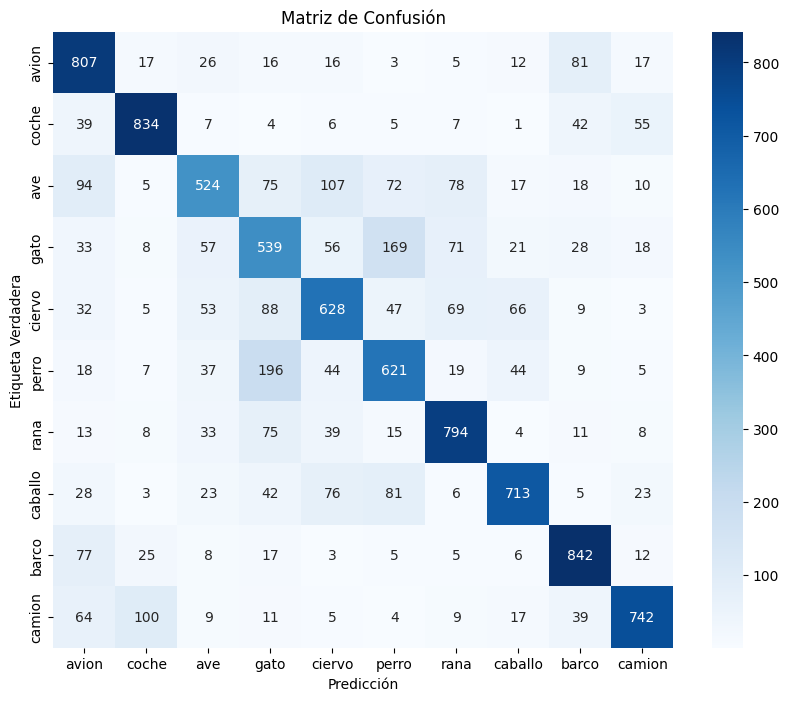

In [12]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualiza la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=MAP_ELEMENTS.values(), yticklabels=MAP_ELEMENTS.values())
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Verdadera")
plt.title("Matriz de Confusión")
plt.show()



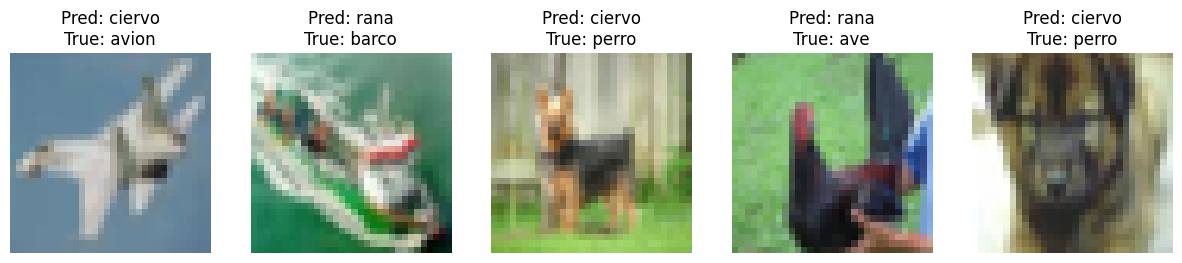

In [13]:
# Visualización de errores
# Encuentra los índices de las imágenes donde el modelo falló
misclassified_indices = np.where(y_pred_classes != y_true)[0]

# Muestra algunas de las imágenes mal clasificadas
num_images = 5  # Número de imágenes a mostrar
plt.figure(figsize=(15, 15))
for i, index in enumerate(misclassified_indices[:num_images]):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[index])
    plt.title(f"Pred: {MAP_ELEMENTS[y_pred_classes[index]]}\nTrue: {MAP_ELEMENTS[y_true[index]]}")
    plt.axis('off')
plt.show()



In [14]:
# Reporte de clasificación - métricas por clase
class_report = classification_report(y_true, y_pred_classes, target_names=MAP_ELEMENTS.values())
print(class_report)



              precision    recall  f1-score   support

       avion       0.67      0.81      0.73      1000
       coche       0.82      0.83      0.83      1000
         ave       0.67      0.52      0.59      1000
        gato       0.51      0.54      0.52      1000
      ciervo       0.64      0.63      0.63      1000
       perro       0.61      0.62      0.61      1000
        rana       0.75      0.79      0.77      1000
     caballo       0.79      0.71      0.75      1000
       barco       0.78      0.84      0.81      1000
      camion       0.83      0.74      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



### Interpretación de la Matriz de Confusión

El modelo fue evaluado en el conjunto de prueba con 10,000 imágenes divididas en 10 clases de CIFAR-10. A continuación se analiza el rendimiento de cada clase según las métricas de **precisión**, **recall** y **f1-score**.

| Clase       | Precisión | Recall | F1-Score | Soporte |
|-------------|-----------|--------|----------|---------|
| Avión       | 0.67      | 0.81   | 0.73     | 1000    |
| Coche       | 0.82      | 0.83   | 0.83     | 1000    |
| Ave         | 0.67      | 0.52   | 0.59     | 1000    |
| Gato        | 0.51      | 0.54   | 0.52     | 1000    |
| Ciervo      | 0.64      | 0.63   | 0.63     | 1000    |
| Perro       | 0.61      | 0.62   | 0.61     | 1000    |
| Rana        | 0.75      | 0.79   | 0.77     | 1000    |
| Caballo     | 0.79      | 0.71   | 0.75     | 1000    |
| Barco       | 0.78      | 0.84   | 0.81     | 1000    |
| Camión      | 0.83      | 0.74   | 0.78     | 1000    |
| **Promedio General** | **0.71** | **0.70** | **0.70** | **10000** |

### Análisis de Métricas

1. **Precisión (Precision)**:
   - La precisión mide la proporción de predicciones correctas entre todas las predicciones realizadas para una clase en particular.
   - Las clases con mayor precisión son **camión** (0.83), **coche** (0.82), y **barco** (0.78), lo que indica que el modelo es bueno al identificar estas categorías.
   - Las clases con menor precisión son **gato** (0.51) y **perro** (0.61), lo que sugiere que el modelo tiende a confundir estas clases con otras.

2. **Recall**:
   - El recall mide la proporción de elementos correctamente identificados en cada clase frente al total de elementos de esa clase en el conjunto de prueba.
   - Las clases con mayor recall son **avión** (0.81), **barco** (0.84), y **rana** (0.79), lo que significa que el modelo identifica bien estos elementos cuando aparecen.
   - Las clases con menor recall son **ave** (0.52) y **gato** (0.54), lo que indica que muchos elementos de estas clases no fueron correctamente clasificados por el modelo.

3. **F1-Score**:
   - El F1-score es una medida combinada de precisión y recall. Un valor alto en F1 indica un buen balance entre ambos.
   - Las clases con mejor F1-score son **coche** (0.83) y **barco** (0.81), indicando un rendimiento sólido en estas categorías.
   - Las clases con mnor F1-score son **gato** (0.52) y **ave** (0.59), mostrando que el modelo tiene dificultades en estas clases.

4. **Promedio General**:
   - La precisión, el recall y el F1-score promedio son aproximadamente 0.70, lo que significa que el modelo tiene un rendimiento moderado en general. No presenta desbalance en estas métricas.
   - **Macro avg** y **weighted avg** están en línea con la precisión general del modelo, indicando que el modelo tiene un desempeño promedio aceptable en el conjunto de datos, aunque con oportunidades de mejora.

### Observaciones

- El modelo tiene un buen rendimiento en clases con características visuales más distintivas, como **camión**, **coche**, y **barco**.
- Las clases **gato** y **perro** tienen un rendimiento inferior, probablemente debido a la similitud en sus características visuales, lo que lleva a confusiones.
- Las clases de animales (por ejemplo, **gato**, **ave**, **perro**) presentan en general menor precisión y recall en comparación con vehículos, lo que sugiere que el modelo tiene dificultades para capturar diferencias sutiles entre diferentes especies de animales.
- Es posible utilizar técnicas como *data augmentatio* pero antes se ajustará la arquitectura y si nos dá el tiempo experimentar con redes preentrenadas, *transfer learning*.

#### Modifiquemos la arquitectura anterior  
Se agregan hasta 128 nucleos o filtros y teniendo cuidado con las dimensiones después de cada convolución y prevenir que las dimensiones se reduzcan demasiado, agregando *padding*.


In [7]:


model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




/media/luis/679bf4c6-b08e-405f-bf66-a325930f4245/2024/1. Maestria_UNIR_AI/2.Semestre 2/Redes neuronales/Actividades/Actividad 2/muinar06_act2_individual/cnn/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-13 20:01:50.697182: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
# Entrenamiento de la red
# Entrenar el modelo
epocas = 20
history = model2.fit(
    x_train, y_train_one_hot,
    epochs=epocas,
    batch_size=64,
    validation_data=(x_valid, y_valid_one_hot)
)



2024-11-11 12:41:54.684904: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


Epoch 1/20
  1/625 ━━━━━━━━━━━━━━━━━━━━ 43:40 4s/step - accuracy: 0.0781 - loss: 5.1601

2024-11-11 12:42:00.478506: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21528576 exceeds 10% of free system memory.
2024-11-11 12:42:00.479529: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21528576 exceeds 10% of free system memory.
2024-11-11 12:42:00.632685: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21528576 exceeds 10% of free system memory.
2024-11-11 12:42:00.632823: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21528576 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 96s 147ms/step - accuracy: 0.3254 - loss: 1.9523 - val_accuracy: 0.5090 - val_loss: 1.3839
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 92s 148ms/step - accuracy: 0.5195 - loss: 1.3429 - val_accuracy: 0.5850 - val_loss: 1.1723
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 158ms/step - accuracy: 0.6016 - loss: 1.1205 - val_accuracy: 0.5912 - val_loss: 1.2792
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 154ms/step - accuracy: 0.6603 - loss: 0.9653 - val_accuracy: 0.6582 - val_loss: 1.0033
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 104s 167ms/step - accuracy: 0.6931 - loss: 0.8791 - val_accuracy: 0.6608 - val_loss: 0.9940
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 152ms/step - accuracy: 0.7248 - loss: 0.7883 - val_accuracy: 0.6796 - val_loss: 0.9476
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 129s 207ms/step - accuracy: 0.7479 - loss: 0.7136 - val_accuracy: 0.7240 - val_loss: 0.8037
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 135s 196ms/step - accuracy: 0.7693 - loss: 0.6567

In [10]:
test_loss, test_accuracy = model2.evaluate(x_test, y_test_one_hot)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.3f}")



313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7317 - loss: 1.0878
Precisión en el conjunto de prueba: 0.731


Se incrementó la precisión en el conjunto de prueba de 0.7044 a 0.731


#### Matriz de Confusión y Métricas por Clase


In [11]:
# Predicciones del modelo en el conjunto de prueba
y_pred = model2.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convierte las probabilidades en etiquetas
y_true = np.squeeze(y_test)  # Convierte las etiquetas verdaderas a una dimensión compatible


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


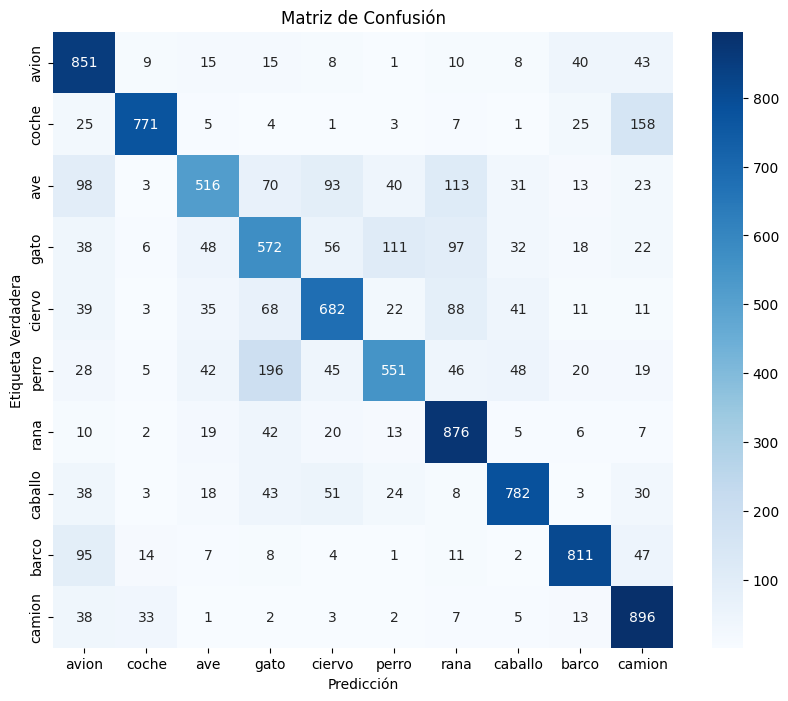

In [12]:
# Matriz de confusión

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualiza la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=MAP_ELEMENTS.values(), yticklabels=MAP_ELEMENTS.values())
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Verdadera")
plt.title("Matriz de Confusión")
plt.show()



In [13]:
# Reporte de clasificación
class_report = classification_report(y_true, y_pred_classes, target_names=MAP_ELEMENTS.values())
print(class_report)


              precision    recall  f1-score   support

       avion       0.68      0.85      0.75      1000
       coche       0.91      0.77      0.83      1000
         ave       0.73      0.52      0.60      1000
        gato       0.56      0.57      0.57      1000
      ciervo       0.71      0.68      0.69      1000
       perro       0.72      0.55      0.62      1000
        rana       0.69      0.88      0.77      1000
     caballo       0.82      0.78      0.80      1000
       barco       0.84      0.81      0.83      1000
      camion       0.71      0.90      0.79      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000



### Análisis Comparativo de Resultados tras la Modificación de la Arquitectura de la Red Neuronal

Después de realizar cambios en la arquitectura de la red, agregando hasta 128 filtros y ajustando el *padding* para prevenir la reducción excesiva de dimensiones, los resultados muestran una mejora general en el rendimiento del modelo en términos de precisión, recall y F1-score. A continuación se analiza cada clase y el rendimiento global.

#### Tabla de Resultados por Clase

| Clase       | Precisión | Recall | F1-Score | Soporte |
|-------------|-----------|--------|----------|---------|
| Avión       | 0.68      | 0.85   | 0.75     | 1000    |
| Coche       | 0.91      | 0.77   | 0.83     | 1000    |
| Ave         | 0.73      | 0.52   | 0.60     | 1000    |
| Gato        | 0.56      | 0.57   | 0.57     | 1000    |
| Ciervo      | 0.71      | 0.68   | 0.69     | 1000    |
| Perro       | 0.72      | 0.55   | 0.62     | 1000    |
| Rana        | 0.69      | 0.88   | 0.77     | 1000    |
| Caballo     | 0.82      | 0.78   | 0.80     | 1000    |
| Barco       | 0.84      | 0.81   | 0.83     | 1000    |
| Camión      | 0.71      | 0.90   | 0.79     | 1000    |
| **Promedio General** | **0.74** | **0.73** | **0.73** | **10000** |

### Análisis de Métricas

1. **Precisión (Precision)**:
   - La precisión promedio aumentó de 0.71 a 0.74, lo que indica una mejora en la capacidad del modelo para realizar predicciones correctas.
   - Las clase que muestra una mejora significativa en precisión  **coche** (de 0.82 a 0.91) en contraste con **camión** (de 0.83 a 0.71).

2. **Recall**:
   - El recall promedio aumentó de 0.70 a 0.73, reflejando una mayor capacidad del modelo para identificar correctamente las instancias de cada clase.
   - Clases como **avión** (de 0.81 a 0.85) y **rana** (de 0.79 a 0.88) mostraron una mejora notable en recall, lo cual es positivo, ya que el modelo está reconociendo más elementos de estas clases correctamente.

3. **F1-Score**:
   - El F1-score promedio aumentó de 0.70 a 0.73, indicando un mejor equilibrio entre precisión y recall.
   - Clases como **caballo** (de 0.75 a 0.80) logró mejoras en F1-score, lo que sugiere una mayor efectividad del modelo en esta categoría.

4. **Promedio General**:
   - La precisión general aumentó del 70% al 73%, lo que representa una mejora en la capacidad de clasificación del modelo en comparación con la versión anterior.
   - **Macro avg** y **weighted avg** están alineados con el promedio general, indicando un buen rendimiento en el conjunto de datos.

### Observaciones y Conclusiones

- El modelo mejorado muestra una precisión y recall promedio mayores, especialmente en clases de vehículos como **coche** y **avión**. Esto sugiere que la adición de filtros y el uso de *padding* permitieron al modelo aprender mejor las características relevantes de estas clases.
- Aunque hay una mejora en general, ciertas clases como **gato** y **ave** aún presentan menores valores de F1-score, lo cual podría indicar una necesidad de más ajustes en la arquitectura o el uso de técnicas adicionales de *data augmentation* para estas categorías.
- La mejora de las métricas sugiere que el ajuste en el número de filtros y el uso adecuado de *padding* ayudaron a estabilizar y mejorar el aprendizaje del modelo sin reducir demasiado las dimensiones de los datos.

### Próximos Pasos

Para seguir mejorando el rendimiento, se podrían considerar las siguientes acciones:
1. Aplicar técnicas de *data augmentation* específicamente para clases de animales, para mejorar el aprendizaje en clases como **gato** y **ave**.
2. Experimentar con arquitecturas de redes preentrenadas como **ResNet** o **VGG** y ajustar estas redes para el conjunto de datos CIFAR-10.
3. Ajustar los hiperparámetros de optimización, como la tasa de aprendizaje, para mejorar la convergencia del modelo.

En general, la red mejorada muestra un rendimiento más sólido, con un aumento en precisión y recall promedio, logrando una clasificación más efectiva en el conjunto de datos CIFAR-10.






In [14]:
# Encuentra los índices de las imágenes donde el modelo falló
misclassified_indices = np.where(y_pred_classes != y_true)[0]

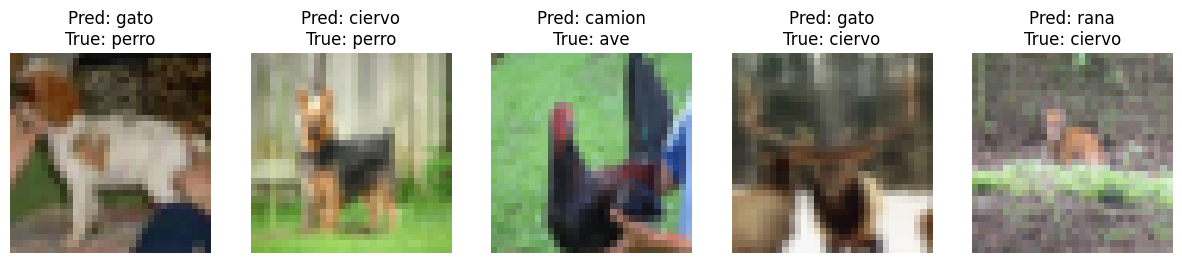

In [15]:

num_images = 5  # Número de imágenes a mostrar
plt.figure(figsize=(15, 15))
for i, index in enumerate(misclassified_indices[:num_images]):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[index])
    plt.title(f"Pred: {MAP_ELEMENTS[y_pred_classes[index]]}\nTrue: {MAP_ELEMENTS[y_true[index]]}")
    plt.axis('off')
plt.show()


#### Iniciemos con la recomendación de mejora: 'Data Augmentation'


#### Entrenar el Modelo usando Data Augmentation

En lugar de pasar directamente el conjunto de datos de entrenamiento al modelo, ahora usaremos el generador de imágenes. Esto permite al modelo ver una nueva versión alterada de cada imagen en cada época, haciendo el entrenamiento más robusto.


In [14]:
# Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definimos el generador
datagen = ImageDataGenerator(
    rotation_range=20,# Rotación aleatoria de la imagen en el rango de 20 grados
    width_shift_range=0.2, # Traslación horizontal aleatoria de la imagen en el rango de 20% de la imagen
    height_shift_range=0.2, # Traslación vertical aleatoria de la imagen en el rango de 20% de la imagen
    horizontal_flip=True, # Volteo horizontal aleatorio de la imagen
    #shew_range=0.2, # Deformación aleatoria de la imagen
    zoom_range=0.2 # Zoom aleatorio de la imagen
)

# Ajustamos el generador a los datos de entrenamiento
datagen.fit(x_train)

# Entrenamos el modelo con el generador
history = model2.fit(
    datagen.flow(x_train, y_train_one_hot, batch_size=64),
    epochs=epocas,
    validation_data=(x_valid, y_valid_one_hot)
)




/media/luis/679bf4c6-b08e-405f-bf66-a325930f4245/2024/1. Maestria_UNIR_AI/2.Semestre 2/Redes neuronales/Actividades/Actividad 2/muinar06_act2_individual/cnn/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.2461 - loss: 2.1100

2024-11-12 20:27:22.053205: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 99s 151ms/step - accuracy: 0.2462 - loss: 2.1097 - val_accuracy: 0.4458 - val_loss: 1.5624
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 93s 149ms/step - accuracy: 0.3508 - loss: 1.7522 - val_accuracy: 0.4763 - val_loss: 1.4255
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 112s 180ms/step - accuracy: 0.4117 - loss: 1.6029 - val_accuracy: 0.3975 - val_loss: 1.8811
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 132s 164ms/step - accuracy: 0.4547 - loss: 1.5006 - val_accuracy: 0.5071 - val_loss: 1.3974
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 100s 160ms/step - accuracy: 0.4919 - loss: 1.4058 - val_accuracy: 0.5937 - val_loss: 1.1469
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 163ms/step - accuracy: 0.5201 - loss: 1.3456 - val_accuracy: 0.6351 - val_loss: 1.0234
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 107s 171ms/step - accuracy: 0.5536 - loss: 1.2609 - val_accuracy: 0.6021 - val_loss: 1.1995
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 112s 179ms/step - accuracy: 0.5667 - loss: 1.2329

In [15]:
test_loss, test_accuracy = model2.evaluate(x_test, y_test_one_hot)


2024-11-12 21:05:17.540149: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7143 - loss: 0.8497


#### Upss, Esto no funcionó como esperaba
Así es que se probará con "Transfer Learning". Para ello se utilizará el modelo preentrenado 'MobilNet'. MobileNet es una arquitectura diseñada para funcionar eficientemente en dispositivos móviles y de baja potencia, por esta razón intentaremos probarla desde un equipo local.


### Transfer Learning

In [8]:
# importar hub de tensorflow para utilizar MobilNet
import tensorflow_hub as hub
import tensorflow as tf


In [9]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Dense, Resizing, Lambda
from tensorflow.keras.models import Model

# URL del modelo preentrenado
url = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"
base_model = hub.KerasLayer(url, trainable=False)

# Construir el modelo utilizando la API funcional
inputs = tf.keras.Input(shape=(32, 32, 3))
x = Resizing(224, 224)(inputs)  # Redimensionar a 224x224
x = Lambda(lambda img: base_model(img))(x)
outputs = Dense(10, activation='softmax')(x)  # Añadir la capa de salida
model = Model(inputs, outputs)

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




In [10]:
model.summary()


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing (Resizing)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 1001)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        10,020 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,020 (39.14 KB)

 Trainable params: 10,020 (39.14 KB)

 Non-trainable params: 0 (0.00 B)

#### Explicación detallada de la arquitectura
1. Capa de Entrada (input_layer_8): Define la entrada del modelo, en este caso con forma (32, 32, 3).

2. Redimensionamiento (resizing_2): Redimensiona la entrada de (32, 32, 3) a (224, 224, 3) para que coincida con el tamaño de entrada que MobileNetV2 espera.

3. Capa Lambda (lambda): Esta capa encapsula el modelo preentrenado MobileNetV2.

    Aunque el modelo MobileNetV2 realiza una serie de operaciones internas (con capas convolucionales, capas de pooling, etc.), estas no se muestran en model.summary().
    La salida de esta capa es (None, 1001), ya que el modelo MobileNetV2 original fue entrenado para clasificar en 1,001 categorías.

4. Capa Densa (dense_7): Añade una capa Dense final con 10 neuronas para tu clasificación personalizada en 10 clases.


In [11]:
# Entrenar el modelo, dadas las limitaciones de máquina, se entrena solo por 5 épocas

history = model.fit(
    x_train, y_train_one_hot,
    epochs= 5,
    batch_size=64,
    validation_data=(x_valid, y_valid_one_hot)
)



2024-11-13 20:04:33.637713: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


Epoch 1/5


2024-11-13 20:04:40.134481: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 128450560 exceeds 10% of free system memory.
2024-11-13 20:04:40.543247: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 128450560 exceeds 10% of free system memory.
2024-11-13 20:04:40.613208: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 128450560 exceeds 10% of free system memory.
2024-11-13 20:04:40.710641: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 77070336 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 1413s 2s/step - accuracy: 0.7358 - loss: 0.8027 - val_accuracy: 0.8447 - val_loss: 0.4466
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1285s 2s/step - accuracy: 0.8574 - loss: 0.4109 - val_accuracy: 0.8565 - val_loss: 0.4116
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1382s 2s/step - accuracy: 0.8677 - loss: 0.3833 - val_accuracy: 0.8648 - val_loss: 0.3897
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1270s 2s/step - accuracy: 0.8726 - loss: 0.3683 - val_accuracy: 0.8607 - val_loss: 0.3986
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1278s 2s/step - accuracy: 0.8771 - loss: 0.3590 - val_accuracy: 0.8597 - val_loss: 0.4101


In [13]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.3f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 263s 840ms/step - accuracy: 0.8574 - loss: 0.4247
Precisión en el conjunto de prueba: 0.858


#### Wow, nada mal. 
Veamos las métricas a nivel de cada categoría

In [15]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Matriz de confusión
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convierte las probabilidades en etiquetas
y_true = np.squeeze(y_test)  # Convierte las etiquetas verdaderas a una dimensión compatible





313/313 ━━━━━━━━━━━━━━━━━━━━ 243s 773ms/step


NameError: name 'confusion_matrix' is not defined

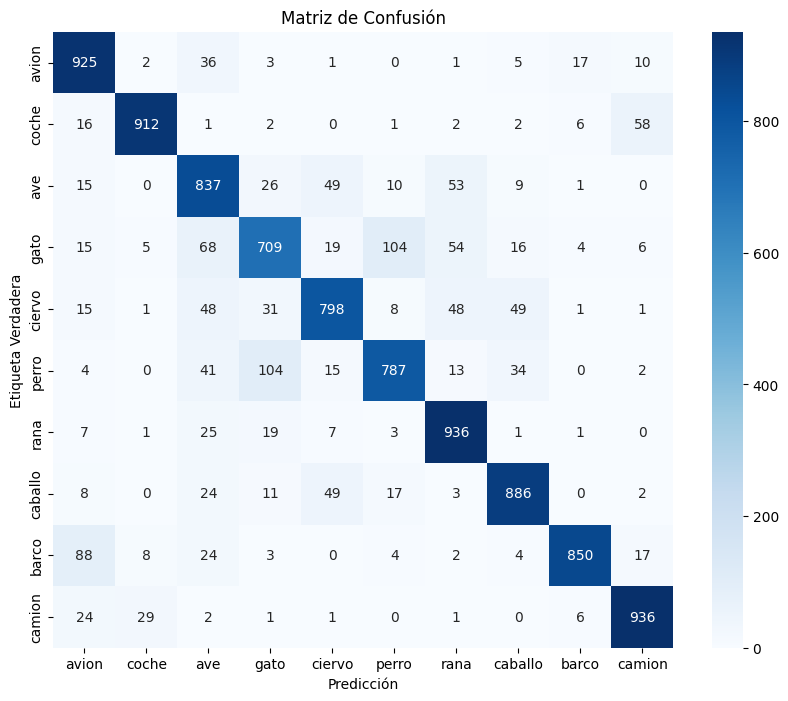

In [16]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualiza la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=MAP_ELEMENTS.values(), yticklabels=MAP_ELEMENTS.values())
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Verdadera")
plt.title("Matriz de Confusión")
plt.show()


In [17]:
# Reporte de clasificación
class_report = classification_report(y_true, y_pred_classes, target_names=MAP_ELEMENTS.values())
print(class_report)


              precision    recall  f1-score   support

       avion       0.83      0.93      0.87      1000
       coche       0.95      0.91      0.93      1000
         ave       0.76      0.84      0.79      1000
        gato       0.78      0.71      0.74      1000
      ciervo       0.85      0.80      0.82      1000
       perro       0.84      0.79      0.81      1000
        rana       0.84      0.94      0.89      1000
     caballo       0.88      0.89      0.88      1000
       barco       0.96      0.85      0.90      1000
      camion       0.91      0.94      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## Story Telling


# **De los Primeros Pasos al Éxito: Una Historia de Aprendizaje con Redes Convolucionales**

El mundo de las redes neuronales convolucionales (CNN) es un vasto campo lleno de oportunidades y desafíos. Para muchos, embarcarse en este viaje significa aceptar que cada intento es un paso hacia la excelencia, una lección invaluable que perfecciona tanto el conocimiento técnico como la capacidad para interpretar datos. Aquí comienza nuestra historia, utilizando el conjunto de datos **CIFAR-10**, un estándar en la clasificación de imágenes, y explorando diversas arquitecturas de CNN en la búsqueda del mejor ajuste.

---

## **Capítulo 1: El Comienzo - Simplicidad y Primeros Logros**

El primer modelo fue una introducción sencilla pero poderosa al mundo de las CNN. Con capas convolucionales y de pooling básicas, este modelo demostró que incluso una arquitectura modesta puede aprender patrones significativos.

### **Arquitectura**:
- Dos capas convolucionales con 32 y 64 filtros, activación ReLU y max pooling.
- Una capa completamente conectada con 64 neuronas y regularización con dropout.
- Una salida softmax para las 10 clases de CIFAR-10.

### **Resultados**:
- **Precisión global**: **70%**.
- Las clases como **camión** (precisión: 83%) y **coche** (precisión: 82%) destacaron, mientras que clases más complejas como **gato** (precisión: 51%) y **ave** (precisión: 67%) mostraron limitaciones.

El mensaje era claro: las capas iniciales eran efectivas, pero el modelo tenía dificultades para captar patrones más sutiles en imágenes de animales. 

---

## **Capítulo 2: Profundizando la Complejidad**

Con el aprendizaje del primer intento, se diseñó una arquitectura más sofisticada. Se introdujeron:
- **Batch normalization** para estabilizar el aprendizaje.
- Más filtros (hasta 128) para capturar detalles más finos.
- Uso de padding para preservar las dimensiones espaciales.

### **Resultados**:
- **Precisión global**: **73%**.
- Mejora significativa en clases como **rana** (de 75% a 88% de recall) y **caballo** (de 75% a 80% en F1-score).
- Clases como **gato** y **ave** siguieron siendo desafiantes, pero mostraron ligeras mejoras.

El modelo más profundo capturó patrones más complejos y detallados, pero aún había margen de mejora. Fue una lección de cómo la optimización progresiva puede mejorar la capacidad de generalización.

---

## **Capítulo 3: Experimentando con Data Augmentation**

El tercer intento buscó aumentar la robustez del modelo mediante **data augmentation**, simulando variaciones en las imágenes como rotaciones, traslaciones y volteos. Esto debía preparar al modelo para manejar mejor datos reales.

### **Resultados**:
- **Precisión global**: **71.4%**, sin mejoras significativas respecto al segundo modelo.

Esta experiencia subrayó que las técnicas como data augmentation no garantizan siempre un salto inmediato en el rendimiento, pero aún así fortalecen la capacidad del modelo para enfrentar datos en escenarios más variados. Estoy seguro que si tuviese mayor capacidad de máquina, uso de GPUs, por ejemplo, puede permitir mejorar estos resultados. Trabajé desde mi máquina, por terquedad e irreverencia con google colab, pero estoy convencido que utilizando computo en la nube, insisto, se pueden tener mejores resultados.

---

## **Capítulo 4: La Revolución del Transfer Learning**

Finalmente, se decidió dar un gran salto al mundo del **Transfer Learning**, utilizando **MobileNetV2**, un modelo preentrenado en el masivo conjunto de datos **ImageNet**. Este enfoque trajo el poder del aprendizaje previo, reutilizando características generales ya aprendidas.

### **Resultados**:
- **Precisión global**: **86%**.
- Clases como **avión** (93%), **coche** (91%) y **rana** (94%) alcanzaron niveles sobresalientes de precisión.
- Incluso clases complicadas como **gato** lograron un F1-score del 74%, mostrando una mejora considerable.

Esta arquitectura no solo superó los límites previos, sino que demostró el potencial del aprendizaje transferido. MobileNetV2 brindó una base sólida para tareas específicas sin necesidad de entrenar desde cero.

---

## **Reflexión Final: Aprender Haciendo**

Esta travesía en el aprendizaje práctico con redes neuronales convolucionales me dejó una lección clara: cada intento, éxito o fallo, refuerza nuestra comprensión. Comenzar con una arquitectura básica me enseñó los fundamentos; profundizar con capas adicionales mostró la importancia del diseño; experimentar con data augmentation nme recordó la complejidad del ajuste fino; y adoptar Transfer Learning evidenció el poder del trabajo previo.

Vaya, el viaje de aprender con CIFAR-10 no fue solo un entendimiento sobre modelos y métricas, sino sobre la relevancia del proceso, celebrar cada pequeño avance y transformar los desafíos en hitos hacia el dominio de la inteligencia artificial. Voy paso a paso, hasta ahora lento pero con confianza.

¡Este es solo el principio de un futuro lleno de posibilidades! 🚀

